In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sb
import matplotlib.pyplot as plt
import random

In [41]:
nums = ['ㄱ','ㄴ','ㄷ','ㄹ','ㅁ','ㅂ','ㅅ','ㅇ','ㅈ','ㅊ','ㅋ','ㅌ','ㅍ','ㅎ','ㅏ','ㅑ','ㅓ','ㅕ','ㅗ','ㅛ','ㅜ','ㅠ','ㅡ','ㅣ','ㅐ','ㅒ','ㅔ','ㅖ','ㅢ','ㅟ']
finaldata = pd.DataFrame(columns=(['aX', 'aY', 'aZ', 'gX','gY','gZ','index','middle','ring','little','thumb']))
j=0
for num in nums:
    #print(num)
    path = '../data/자음모음/%s.csv'%num
    read_data = pd.read_csv(path, engine='python', encoding='cp949')
    #num.columns =['aX', 'aY', 'aZ', 'gX','gY','gZ','little','ring','middle','index','thumb']
    data= read_data
    data.drop(data.columns[0], axis = 1, inplace= True)
    #print(num)
    #print(data)
    
    for k in data.columns:     #data.columns[w:] if you have w column of line description 
        data[k] = data[k].fillna(data[k].median())

    #data = data.filter(['little','ring','middle','index','thumb'])
    data.insert(11,'Character',j)
    j=j+1
    finaldata = pd.concat([finaldata, data], sort=False, ignore_index=True)

#finaldata.to_csv('../data/data_set.csv')
   
print(finaldata)
#print(num)


    


         aX    aY    aZ    gX    gY    gZ index middle ring little thumb  \
0      0.58  0.74  0.41  1.77 -2.26 -6.71   310    236  468    413   219   
1      0.58  0.74  0.39  2.93  1.77 -8.30   309    236  464    413   220   
2      0.53  0.73  0.41 -5.25 -5.68 -4.82   310    235  467    412   223   
3      0.57  0.75  0.39  2.44 -6.41 -1.83   312    238  459    412   228   
4      0.57  0.76  0.39 -1.59 -3.17 -4.39   309    238  465    416   220   
...     ...   ...   ...   ...   ...   ...   ...    ...  ...    ...   ...   
60915  0.50  0.81  0.30  3.91 -2.87 -1.71   437    208  282    358   364   
60916  0.52  0.80  0.27  0.55 -5.86 -1.53   445    209  282    359   365   
60917  0.56  0.82  0.26  0.24 -4.09 -0.49   438    209  281    356   366   
60918  0.57  0.82  0.25  0.92 -4.64 -2.38   445    207  283    359   367   
60919  0.54  0.78  0.27 -0.67 -3.78 -4.88   444    208  281    361   363   

       Character  
0            0.0  
1            0.0  
2            0.0  
3          

In [42]:
60920 / 2000

30.46

### 데이터 전처리
- 기존의 데이터를 머신러닝 알고리즘에 알맞은 데이터로 바꾸는 과정
- 모델이 생성된 이후에도 예측하고자 하는 새로운 데이터에도 적용하는 과정
- 전처리 과정을 통해 모델 학습의 성능을 높일 수 있음

In [6]:
finaldata = finaldata.astype({'Character':int})
finaldata
finaldata.to_csv('../data/all_data.csv')

In [ ]:
data_set = data_set.astype({'Character':int})
data_set
data_set.to_csv('../data/all_data.csv')

In [8]:
finaldata = pd.read_csv('../data/all_data.csv', engine='python', encoding='cp949')

In [9]:
finaldata

,Unnamed: 0,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,0,0.58,0.74,0.41,1.77,-2.26,-6.71,310,236,468,413,219,0
1,1,0.58,0.74,0.39,2.93,1.77,-8.30,309,236,464,413,220,0
2,2,0.53,0.73,0.41,-5.25,-5.68,-4.82,310,235,467,412,223,0
3,3,0.57,0.75,0.39,2.44,-6.41,-1.83,312,238,459,412,228,0
4,4,0.57,0.76,0.39,-1.59,-3.17,-4.39,309,238,465,416,220,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60915,60915,0.50,0.81,0.30,3.91,-2.87,-1.71,437,208,282,358,364,29
60916,60916,0.52,0.80,0.27,0.55,-5.86,-1.53,445,209,282,359,365,29
60917,60917,0.56,0.82,0.26,0.24,-4.09,-0.49,438,209,281,356,366,29
60918,60918,0.57,0.82,0.25,0.92,-4.64,-2.38,445,207,283,359,367,29


결측치 확인

In [43]:
finaldata.isnull().sum()

aX           0
aY           0
aZ           0
gX           0
gY           0
gZ           0
index        0
middle       0
ring         0
little       0
thumb        0
Character    0
dtype: int64

In [44]:
# 중복 데이터 확인
finaldata.duplicated().sum()

45690

In [23]:
finaldata.drop(['Unnamed: 0'], axis = 1, inplace =True)

In [24]:
finaldata

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,0.58,0.74,0.41,1.77,-2.26,-6.71,310,236,468,413,219,0
1,0.58,0.74,0.39,2.93,1.77,-8.30,309,236,464,413,220,0
2,0.53,0.73,0.41,-5.25,-5.68,-4.82,310,235,467,412,223,0
3,0.57,0.75,0.39,2.44,-6.41,-1.83,312,238,459,412,228,0
4,0.57,0.76,0.39,-1.59,-3.17,-4.39,309,238,465,416,220,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60915,0.50,0.81,0.30,3.91,-2.87,-1.71,437,208,282,358,364,29
60916,0.52,0.80,0.27,0.55,-5.86,-1.53,445,209,282,359,365,29
60917,0.56,0.82,0.26,0.24,-4.09,-0.49,438,209,281,356,366,29
60918,0.57,0.82,0.25,0.92,-4.64,-2.38,445,207,283,359,367,29


In [25]:
finaldata.to_csv('../data/data_set.csv')

In [26]:
finaldata

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,0.58,0.74,0.41,1.77,-2.26,-6.71,310,236,468,413,219,0
1,0.58,0.74,0.39,2.93,1.77,-8.30,309,236,464,413,220,0
2,0.53,0.73,0.41,-5.25,-5.68,-4.82,310,235,467,412,223,0
3,0.57,0.75,0.39,2.44,-6.41,-1.83,312,238,459,412,228,0
4,0.57,0.76,0.39,-1.59,-3.17,-4.39,309,238,465,416,220,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60915,0.50,0.81,0.30,3.91,-2.87,-1.71,437,208,282,358,364,29
60916,0.52,0.80,0.27,0.55,-5.86,-1.53,445,209,282,359,365,29
60917,0.56,0.82,0.26,0.24,-4.09,-0.49,438,209,281,356,366,29
60918,0.57,0.82,0.25,0.92,-4.64,-2.38,445,207,283,359,367,29


In [27]:
finaldata.isnull().sum()

aX           0
aY           0
aZ           0
gX           0
gY           0
gZ           0
index        0
middle       0
ring         0
little       0
thumb        0
Character    0
dtype: int64

In [28]:
finaldata.duplicated().sum()

45690

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

In [11]:
test = finaldata.copy()
test = test.drop("Character",axis = 1)
test

,Unnamed: 0,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb
0,0,0.58,0.74,0.41,1.77,-2.26,-6.71,310,236,468,413,219
1,1,0.58,0.74,0.39,2.93,1.77,-8.30,309,236,464,413,220
2,2,0.53,0.73,0.41,-5.25,-5.68,-4.82,310,235,467,412,223
3,3,0.57,0.75,0.39,2.44,-6.41,-1.83,312,238,459,412,228
4,4,0.57,0.76,0.39,-1.59,-3.17,-4.39,309,238,465,416,220
...,...,...,...,...,...,...,...,...,...,...,...,...
60915,60915,0.50,0.81,0.30,3.91,-2.87,-1.71,437,208,282,358,364
60916,60916,0.52,0.80,0.27,0.55,-5.86,-1.53,445,209,282,359,365
60917,60917,0.56,0.82,0.26,0.24,-4.09,-0.49,438,209,281,356,366
60918,60918,0.57,0.82,0.25,0.92,-4.64,-2.38,445,207,283,359,367


In [12]:
y = finaldata["Character"].copy()
y

0         0
1         0
2         0
3         0
4         0
         ..
60915    29
60916    29
60917    29
60918    29
60919    29
Name: Character, Length: 60920, dtype: int64

### 데이터 셔플

In [6]:
finaldata_shuffled=finaldata.iloc[np.random.permutation(finaldata.index)].reset_index(drop=True)
finaldata_shuffled

,Unnamed: 0,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
0,4802,0.93,-0.33,0.20,1.46,-1.65,-3.36,286,407,459,331,263,2
1,25911,-0.10,-0.96,0.23,1.40,-1.83,-3.30,257,202,293,311,232,12
2,35226,0.93,-0.36,0.14,-0.24,-4.46,-1.65,448,402,284,215,343,17
3,24615,-0.12,-0.92,0.39,1.04,4.94,-8.12,240,189,270,303,234,12
4,31316,-0.02,-0.94,0.30,5.25,-2.08,-1.65,459,419,263,181,342,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60915,22497,0.88,-0.32,0.37,-0.55,-1.53,-3.17,469,421,456,340,279,11
60916,37823,0.20,-0.97,-0.07,0.31,-3.05,-3.60,450,209,288,224,376,18
60917,28765,0.10,-0.96,0.08,1.53,6.23,-3.42,446,202,264,206,351,14
60918,28275,0.17,-0.98,0.19,0.92,-3.91,-0.85,458,201,266,212,354,14


테스트 셋 분리

In [61]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(finaldata, test_size = 0.2, random_state = 42)

In [62]:
test_set.head()

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
2980,0.91,-0.40,-0.13,0.79,-3.48,-2.56,311,244,471,397,240,1
12955,-0.03,0.86,0.49,0.00,-3.30,-1.95,281,398,442,344,221,6
6920,0.90,-0.23,0.30,-0.06,-2.81,-1.65,471,404,460,341,238,3
36838,0.18,-0.94,-0.08,0.37,-1.83,-4.03,450,211,290,224,379,18
19077,0.34,0.82,0.48,1.46,-3.42,-2.62,435,407,461,420,257,9


In [63]:
suhwa = train_set.copy()
suhwa

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb,Character
56513,0.85,-0.50,-0.07,0.61,-4.09,-1.28,455,398,253,394,357,27
42035,0.36,0.93,0.14,1.22,-4.76,-4.64,458,195,273,220,328,20
38146,0.11,-0.99,-0.11,9.70,-5.19,12.45,450,200,287,220,379,18
25996,-0.11,-0.95,0.29,-0.24,-3.36,-1.83,261,208,298,313,237,12
30440,-0.04,-0.95,0.34,-0.18,-3.72,-2.32,462,406,266,187,343,15
...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.84,-0.38,-0.37,1.10,-2.87,-2.26,451,179,236,408,362,26
38158,0.12,-0.99,0.00,-4.82,-1.59,-1.22,450,202,286,214,381,18
860,0.46,0.81,0.42,1.04,-3.60,-3.05,327,251,468,419,240,0
15795,-0.17,-0.98,-0.06,-3.91,-9.70,-3.30,413,288,337,343,423,7


In [102]:
X = suhwa.drop("Character", axis = 1)
y = suhwa["Character"].copy()

In [103]:
X

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb
56513,0.85,-0.50,-0.07,0.61,-4.09,-1.28,455,398,253,394,357
42035,0.36,0.93,0.14,1.22,-4.76,-4.64,458,195,273,220,328
38146,0.11,-0.99,-0.11,9.70,-5.19,12.45,450,200,287,220,379
25996,-0.11,-0.95,0.29,-0.24,-3.36,-1.83,261,208,298,313,237
30440,-0.04,-0.95,0.34,-0.18,-3.72,-2.32,462,406,266,187,343
...,...,...,...,...,...,...,...,...,...,...,...
54343,0.84,-0.38,-0.37,1.10,-2.87,-2.26,451,179,236,408,362
38158,0.12,-0.99,0.00,-4.82,-1.59,-1.22,450,202,286,214,381
860,0.46,0.81,0.42,1.04,-3.60,-3.05,327,251,468,419,240
15795,-0.17,-0.98,-0.06,-3.91,-9.70,-3.30,413,288,337,343,423


In [70]:
# Importing the required packages
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [104]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [105]:
cross_val_score_array1 = cross_val_score(clf, X, y, cv=10, scoring="accuracy")
print(cross_val_score_array1)
print("acc/t", np.mean(cross_val_score_array1))
print("acc-stdev/t", cross_val_score_array1.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
acc/t 1.0
acc-stdev/t 0.0


In [94]:
clf.fit(x_train, y_train)
pred = clf.predict(x_valid)

In [106]:
pred = clf.predict(X_valid)

In [107]:
clf

RandomForestClassifier(random_state=42)

In [108]:
x_valid

,aX,aY,aZ,gX,gY,gZ,index,middle,ring,little,thumb
28210,0.12,-0.98,0.17,3.36,-2.87,-5.86,442,199,259,209,354
12962,-0.04,0.87,0.51,0.61,-2.56,-2.44,279,404,443,346,217
20284,0.37,0.86,0.42,-6.90,6.04,-11.47,356,398,348,419,251
38971,0.12,-0.99,-0.03,0.73,-2.93,-2.93,456,444,267,205,348
19768,0.17,0.89,0.45,-0.61,0.61,-2.44,416,402,463,423,271
...,...,...,...,...,...,...,...,...,...,...,...
13772,0.13,0.89,0.43,-0.98,-2.20,-2.69,271,400,455,345,217
12620,0.13,0.90,0.37,1.53,-4.27,-1.95,263,404,453,349,210
4030,0.98,-0.22,0.16,0.24,-2.01,-1.89,284,433,452,331,247
7470,0.92,-0.22,0.30,-0.61,-3.60,-5.13,470,406,455,337,236


In [109]:
clf.feature_importances_

array([0.11058047, 0.10889389, 0.1066303 , 0.00068819, 0.00062266,
       0.00051369, 0.1107881 , 0.13631832, 0.11508217, 0.14252189,
       0.16736033])

In [110]:
print(accuracy_score(y_valid, pred))

0.9997948297086582


In [113]:
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=10)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[1284,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1294,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1282,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1283,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1276,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 

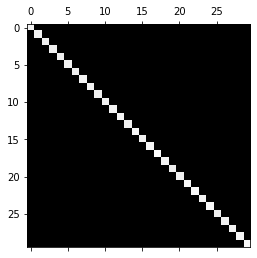

In [114]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [137]:
a = pd.read_csv('../data/User/자음/jh/ㄹ.csv')
b = pd.read_csv('../data/User/자음/nh/ㄹ.csv')
c = pd.read_csv('../data/User/자음/yj/ㄹ.csv')
d = pd.read_csv('../data/User/자음/jy/ㄹ.csv')

In [138]:
a.columns = ["aX", "aY", "aZ", "gX","gY","gZ",'little','ring','middle','index','thumb']
b.columns = ["aX", "aY", "aZ", "gX","gY","gZ",'little','ring','middle','index','thumb']
c.columns = ["aX", "aY", "aZ", "gX","gY","gZ",'little','ring','middle','index','thumb']
d.columns = ["aX", "aY", "aZ", "gX","gY","gZ",'little','ring','middle','index','thumb']

In [139]:
a

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb
0,0.93,-0.36,-0.07,0.43,-1.83,-2.20,224,294,398,465,275
1,0.92,-0.36,-0.06,5.43,-3.97,-4.46,227,294,397,463,271
2,0.93,-0.36,-0.06,1.22,-2.32,-4.64,224,295,396,468,278
3,0.93,-0.35,-0.07,2.62,-2.56,-2.75,221,300,398,465,275
4,0.93,-0.35,-0.06,1.28,-2.14,-4.03,228,301,404,475,280
...,...,...,...,...,...,...,...,...,...,...,...
495,0.94,-0.22,-0.17,-3.05,13.43,-11.17,204,267,387,465,291
496,0.96,-0.22,-0.17,-0.31,-1.34,-3.05,203,277,390,466,291
497,0.96,-0.22,-0.17,2.99,3.42,-9.28,204,265,385,460,295
498,0.98,-0.22,-0.16,-0.98,-3.23,-2.50,213,270,384,465,301


In [140]:
b

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb
0,0.93,-0.23,0.30,-0.12,-1.16,-2.26,314,446,411,239,222
1,0.94,-0.22,0.30,-0.12,-1.95,-1.46,312,446,409,236,226
2,0.94,-0.22,0.30,-0.06,-2.50,-0.06,315,446,411,237,221
3,0.93,-0.21,0.31,-1.16,-3.17,-1.71,316,441,411,234,221
4,0.96,-0.23,0.30,0.55,-3.85,-2.14,312,449,410,239,220
...,...,...,...,...,...,...,...,...,...,...,...
503,0.91,-0.10,0.47,0.12,-1.83,-5.55,325,455,389,255,229
504,0.94,-0.08,0.42,-0.73,-4.39,-5.43,326,451,393,256,229
505,0.93,-0.16,0.34,-41.56,-43.03,-1.28,325,448,385,261,235
506,1.00,-0.18,0.03,-12.88,20.39,-25.09,353,457,387,463,373


In [141]:
c

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb
0,0.97,-0.23,0.17,-2.62,-5.98,-2.62,327,445,442,281,248
1,0.98,-0.22,0.14,0.67,-4.46,-2.56,327,456,441,285,248
2,0.97,-0.22,0.15,-0.92,-2.08,-2.38,328,451,446,283,247
3,0.97,-0.23,0.15,0.73,-2.87,-1.65,328,459,444,286,245
4,0.96,-0.22,0.16,0.00,-2.38,-2.38,328,447,442,299,247
...,...,...,...,...,...,...,...,...,...,...,...
496,0.94,-0.24,0.26,0.55,-3.17,-2.38,337,454,395,291,251
497,0.94,-0.25,0.25,0.49,-3.66,-3.66,335,460,395,291,248
498,0.94,-0.24,0.26,1.04,-3.48,-2.20,334,453,394,294,246
499,0.95,-0.24,0.26,-1.10,-1.34,-3.17,335,455,395,291,251


In [142]:
d

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb
0,1.04,-0.15,-0.00,10.56,-0.24,-4.52,259,350,427,464,331
1,1.01,-0.19,0.10,10.44,2.75,-16.78,256,348,430,468,326
2,0.98,-0.23,0.03,-7.87,3.42,-7.87,257,349,434,471,330
3,0.93,-0.25,0.11,6.96,-2.99,1.16,253,348,432,470,325
4,0.97,-0.24,0.11,-5.55,-0.37,-2.08,258,353,433,468,325
...,...,...,...,...,...,...,...,...,...,...,...
500,0.90,-0.37,-0.04,2.50,2.32,-2.50,235,289,430,478,326
501,0.97,-0.34,-0.08,0.00,-9.95,-3.05,242,295,433,475,323
502,0.93,-0.36,-0.02,1.22,-2.62,-1.65,242,295,435,475,322
503,0.94,-0.35,-0.03,3.30,-1.28,-1.65,245,298,428,472,327


In [143]:
one_data = pd.concat([a,b,c,d],sort=False,ignore_index = True)

In [144]:
one_data

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb
0,0.93,-0.36,-0.07,0.43,-1.83,-2.20,224,294,398,465,275
1,0.92,-0.36,-0.06,5.43,-3.97,-4.46,227,294,397,463,271
2,0.93,-0.36,-0.06,1.22,-2.32,-4.64,224,295,396,468,278
3,0.93,-0.35,-0.07,2.62,-2.56,-2.75,221,300,398,465,275
4,0.93,-0.35,-0.06,1.28,-2.14,-4.03,228,301,404,475,280
...,...,...,...,...,...,...,...,...,...,...,...
2009,0.90,-0.37,-0.04,2.50,2.32,-2.50,235,289,430,478,326
2010,0.97,-0.34,-0.08,0.00,-9.95,-3.05,242,295,433,475,323
2011,0.93,-0.36,-0.02,1.22,-2.62,-1.65,242,295,435,475,322
2012,0.94,-0.35,-0.03,3.30,-1.28,-1.65,245,298,428,472,327


In [149]:
one_data.insert(11,'number',2)

In [150]:
one_data

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb,number
0,0.93,-0.36,-0.07,0.43,-1.83,-2.20,224,294,398,465,275,2
1,0.92,-0.36,-0.06,5.43,-3.97,-4.46,227,294,397,463,271,2
2,0.93,-0.36,-0.06,1.22,-2.32,-4.64,224,295,396,468,278,2
3,0.93,-0.35,-0.07,2.62,-2.56,-2.75,221,300,398,465,275,2
4,0.93,-0.35,-0.06,1.28,-2.14,-4.03,228,301,404,475,280,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2009,0.90,-0.37,-0.04,2.50,2.32,-2.50,235,289,430,478,326,2
2010,0.97,-0.34,-0.08,0.00,-9.95,-3.05,242,295,433,475,323,2
2011,0.93,-0.36,-0.02,1.22,-2.62,-1.65,242,295,435,475,322,2
2012,0.94,-0.35,-0.03,3.30,-1.28,-1.65,245,298,428,472,327,2


In [151]:
one_data.to_csv('../data/data_set/ㄷ.csv')

In [146]:
one_data.duplicated().sum()

0

In [176]:
one_data = pd.read_csv('../data/data_set/ㄹ.csv')

In [177]:
one_data

,Unnamed: 0,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb
0,0,0.95,-0.29,0.02,17.40,0.55,1.89,190,471,414,471,284
1,1,0.96,-0.29,0.01,1.34,-2.20,-2.20,194,471,411,469,285
2,2,0.98,-0.30,0.01,-3.17,1.22,-6.04,195,475,415,476,284
3,3,0.96,-0.28,0.05,2.75,-8.36,1.46,199,477,412,481,285
4,4,0.95,-0.28,0.05,-1.34,-0.55,-6.10,200,477,411,479,288
...,...,...,...,...,...,...,...,...,...,...,...,...
2107,2107,0.85,-0.51,0.12,1.77,-4.15,-2.75,271,485,420,462,351
2108,2108,0.83,-0.51,0.16,0.67,-2.44,-1.95,247,486,420,462,351
2109,2109,0.90,-0.43,0.15,-11.29,-2.69,-7.81,247,481,421,463,349
2110,2110,0.88,-0.49,0.10,-1.59,-5.00,-2.56,248,483,421,458,353


In [178]:
one_data.drop(one_data.columns[0], axis = 1, inplace= True)

In [179]:
one_data

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb
0,0.95,-0.29,0.02,17.40,0.55,1.89,190,471,414,471,284
1,0.96,-0.29,0.01,1.34,-2.20,-2.20,194,471,411,469,285
2,0.98,-0.30,0.01,-3.17,1.22,-6.04,195,475,415,476,284
3,0.96,-0.28,0.05,2.75,-8.36,1.46,199,477,412,481,285
4,0.95,-0.28,0.05,-1.34,-0.55,-6.10,200,477,411,479,288
...,...,...,...,...,...,...,...,...,...,...,...
2107,0.85,-0.51,0.12,1.77,-4.15,-2.75,271,485,420,462,351
2108,0.83,-0.51,0.16,0.67,-2.44,-1.95,247,486,420,462,351
2109,0.90,-0.43,0.15,-11.29,-2.69,-7.81,247,481,421,463,349
2110,0.88,-0.49,0.10,-1.59,-5.00,-2.56,248,483,421,458,353


In [180]:
one_data.insert(11,'number',3)

In [181]:
one_data

,aX,aY,aZ,gX,gY,gZ,little,ring,middle,index,thumb,number
0,0.95,-0.29,0.02,17.40,0.55,1.89,190,471,414,471,284,3
1,0.96,-0.29,0.01,1.34,-2.20,-2.20,194,471,411,469,285,3
2,0.98,-0.30,0.01,-3.17,1.22,-6.04,195,475,415,476,284,3
3,0.96,-0.28,0.05,2.75,-8.36,1.46,199,477,412,481,285,3
4,0.95,-0.28,0.05,-1.34,-0.55,-6.10,200,477,411,479,288,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2107,0.85,-0.51,0.12,1.77,-4.15,-2.75,271,485,420,462,351,3
2108,0.83,-0.51,0.16,0.67,-2.44,-1.95,247,486,420,462,351,3
2109,0.90,-0.43,0.15,-11.29,-2.69,-7.81,247,481,421,463,349,3
2110,0.88,-0.49,0.10,-1.59,-5.00,-2.56,248,483,421,458,353,3


In [182]:
one_data.to_csv('../data/data_set/ㄹ.csv')